In [1]:
import DirectDmTargets as dddm

calculating effective efficiency for Xe detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Ge detector done


In [2]:
import time

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tqdm import tqdm

# Finding the correct 'factor' #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

25 october 2019 

## Goal ## 
- in the DetectorSpectrum-class a factor is used to rebin the DM-spectrum. This rebinning should be fine enough to allow the numerical integration to be sufficiently accurate. However we don't want a too fine binning as it does increase computation time drastically. 

## Result ##
A factor (the factor between the the bins used for the numerical integration and the spectrum) is set to **10** as this proved a fair trade off between speed and accuracy.

## Distribution of the DM ##
First we need to make a DM-rate spectrum (below we first compare the un-smeared and smeared spectrum)

In [5]:
use_SHM = dddm.SHM()

In [6]:
# No detector resolution
def plot_spectrum(data, color = 'blue', label = 'label', linestyle = 'none'):
    plt.errorbar(data['bin_centers'], data['counts'], 
                xerr=(data['bin_left'] - data['bin_right'])/2,
                yerr = np.sqrt(data['counts']),
                color = color,
                linestyle = linestyle,
                capsize = 2,
                marker = 'o',
                label = label
                )

In [7]:
%%time
xe_events = dddm.GenSpectrum(50, 1e-45, use_SHM, dddm.detectors['Xe'])
xe_events.n_bins = 10
xe_galact = xe_events.get_data(poisson = False)
xe_galact

Wall time: 59.7 ms


,counts,bin_centers,bin_left,bin_right
0,449.967261,5.0,0.0,10.0
1,172.541377,15.0,10.0,20.0
2,61.551390,25.0,20.0,30.0
3,20.377729,35.0,30.0,40.0
4,6.183480,45.0,40.0,50.0
5,1.675711,55.0,50.0,60.0
6,0.384984,65.0,60.0,70.0
7,0.066505,75.0,70.0,80.0
8,0.005831,85.0,80.0,90.0
9,0.000015,95.0,90.0,100.0


In [8]:
def get_det_spec(det):
    events = dddm.DetectorSpectrum(50, 1e-45, use_SHM, dddm.detectors[det])
    return events.get_data(poisson = False)

In [9]:
%%time
get_det_spec('Xe')

Wall time: 808 ms


,counts,bin_centers,bin_left,bin_right
0,20.543476,5.0,0.0,10.0
1,156.624879,15.0,10.0,20.0
2,64.765430,25.0,20.0,30.0
3,22.123232,35.0,30.0,40.0
4,6.992244,45.0,40.0,50.0
5,2.005902,55.0,50.0,60.0
6,0.504013,65.0,60.0,70.0
7,0.103457,75.0,70.0,80.0
8,0.014957,85.0,80.0,90.0
9,0.001162,95.0,90.0,100.0


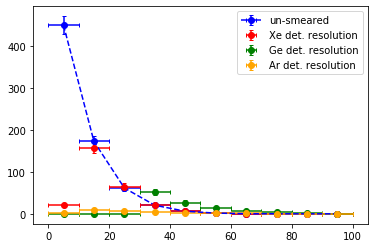

In [10]:
plot_spectrum(xe_galact, label = 'un-smeared', linestyle = '--')
plot_spectrum(get_det_spec('Xe'), 'red', label = 'Xe det. resolution')
plot_spectrum(get_det_spec('Ge'), 'green', label = 'Ge det. resolution')
plot_spectrum(get_det_spec('Ar'), 'orange', label = 'Ar det. resolution')
plt.legend()

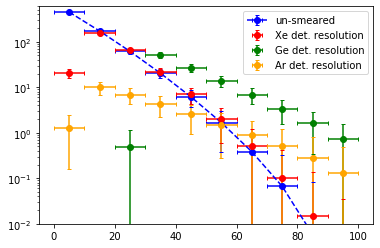

In [11]:
plot_spectrum(xe_galact, label = 'un-smeared', linestyle = '--')
plot_spectrum(get_det_spec('Xe'), 'red', label = 'Xe det. resolution')
plot_spectrum(get_det_spec('Ge'), 'green', label = 'Ge det. resolution')
plot_spectrum(get_det_spec('Ar'), 'orange', label = 'Ar det. resolution')
plt.yscale("log")
plt.ylim(0.01,600)
plt.legend()

## Finding the correct factor ##

In [12]:
stats_ge = dddm.NestleStatModel("Ge")
stats_ge.get_summary()

StatModel::	initialized for Ge detector. See print(stat_model) for default settings
run_nestle::	start_fit for 2 parameters
run_nestle::	fit_done in 3243 s (0.9 h)
	 log_mass  1.72 +/-  0.05
	 mass 52.4 +/- 6.2
	 log_cross_section -45.01 +/-  0.07
	 cross_section 9.77e-46 +/- 1.5e-46


{'nestle_nposterior': 3159,
 'nestle_time': 3243,
 'nestle_logZ': -13.4772292728476,
 'nestle_logZerr': 0.0797937297263837,
 'summary': 'niter: 10845\nncall: 27008\nnsamples: 11869\nlogz: -13.477 +/-  0.080\nh:  6.520',
 'N_posterior_samples ': 3159,
 'log_mass_fit_res': ' 1.72 +/-  0.05',
 'mass_fit_res': '52.4 +/- 6.2',
 'log_cross_section_fit_res': '-45.01 +/-  0.07',
 'cross_section_fit_res': '9.77e-46 +/- 1.5e-46'}

In [17]:
stats_ge.check_spectrum()

,counts,bin_centers,bin_left,bin_right
0,0.000000e+00,5.0,0.0,10.0
1,2.436533e-131,15.0,10.0,20.0
2,6.397919e-01,25.0,20.0,30.0
3,6.830771e+01,35.0,30.0,40.0
4,3.574303e+01,45.0,40.0,50.0
5,1.825363e+01,55.0,50.0,60.0
6,9.149500e+00,65.0,60.0,70.0
7,4.486260e+00,75.0,70.0,80.0
8,2.143133e+00,85.0,80.0,90.0
9,9.785029e-01,95.0,90.0,100.0


In [13]:
stats_xe = dddm.NestleStatModel("Xe")
stats_xe.get_summary()

StatModel::	initialized for Xe detector. See print(stat_model) for default settings
run_nestle::	start_fit for 2 parameters
run_nestle::	fit_done in 3028 s (0.8 h)
	 log_mass  1.72 +/-  0.04
	 mass 52.1 +/- 4.4
	 log_cross_section -45.00 +/-  0.02
	 cross_section 1e-45 +/- 5.7e-47


{'nestle_nposterior': 3344,
 'nestle_time': 3028,
 'nestle_logZ': -11.826996454676118,
 'nestle_logZerr': 0.08374857514335748,
 'summary': 'niter: 11467\nncall: 26239\nnsamples: 12491\nlogz: -11.827 +/-  0.084\nh:  7.182',
 'N_posterior_samples ': 3344,
 'log_mass_fit_res': ' 1.72 +/-  0.04',
 'mass_fit_res': '52.1 +/- 4.4',
 'log_cross_section_fit_res': '-45.00 +/-  0.02',
 'cross_section_fit_res': '1e-45 +/- 5.7e-47'}

In [16]:
stats_xe.check_spectrum()

,counts,bin_centers,bin_left,bin_right
0,27.391302,5.0,0.0,10.0
1,208.833173,15.0,10.0,20.0
2,86.353906,25.0,20.0,30.0
3,29.497642,35.0,30.0,40.0
4,9.322992,45.0,40.0,50.0
5,2.674535,55.0,50.0,60.0
6,0.672017,65.0,60.0,70.0
7,0.137943,75.0,70.0,80.0
8,0.019942,85.0,80.0,90.0
9,0.001549,95.0,90.0,100.0


In [14]:
stats_ar = dddm.NestleStatModel("Ar")
stats_ar.get_summary()

StatModel::	initialized for Ar detector. See print(stat_model) for default settings
run_nestle::	start_fit for 2 parameters


KeyboardInterrupt: 

In [15]:
stats_ar.check_spectrum()

,counts,bin_centers,bin_left,bin_right
0,1.726672,5.0,0.0,10.0
1,13.235262,15.0,10.0,20.0
2,9.212146,25.0,20.0,30.0
3,5.643130,35.0,30.0,40.0
4,3.394379,45.0,40.0,50.0
5,2.007569,55.0,50.0,60.0
6,1.167803,65.0,60.0,70.0
7,0.667525,75.0,70.0,80.0
8,0.371292,85.0,80.0,90.0
9,0.177248,95.0,90.0,100.0
